<a href="https://colab.research.google.com/github/pradiptars/ML_Indian_bike_price/blob/main/bikesale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving bike_sales_india.csv to bike_sales_india.csv


In [3]:
df = pd.read_csv('bike_sales_india.csv')

In [4]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [5]:
df.head(2)

,State,Avg Daily Distance (km),Brand,Model,Price (INR),Year of Manufacture,Engine Capacity (cc),Fuel Type,Mileage (km/l),Owner Type,Registration Year,Insurance Status,Seller Type,Resale Price (INR),City Tier
0,Karnataka,68.84,Royal Enfield,Hunter 350,252816,2021,672,Electric,78.41,Second,2024,Active,Individual,149934.18,Tier 3
1,Rajasthan,23.80,Bajaj,Dominar 400,131100,2020,769,Hybrid,89.98,Third,2023,Active,Individual,66960.30,Tier 3


In [6]:
df.isnull().sum()

,0
State,0
Avg Daily Distance (km),0
Brand,0
Model,0
Price (INR),0
Year of Manufacture,0
Engine Capacity (cc),0
Fuel Type,0
Mileage (km/l),0
Owner Type,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   State                    10000 non-null  object 
 1   Avg Daily Distance (km)  10000 non-null  float64
 2   Brand                    10000 non-null  object 
 3   Model                    10000 non-null  object 
 4   Price (INR)              10000 non-null  int64  
 5   Year of Manufacture      10000 non-null  int64  
 6   Engine Capacity (cc)     10000 non-null  int64  
 7   Fuel Type                10000 non-null  object 
 8   Mileage (km/l)           10000 non-null  float64
 9   Owner Type               10000 non-null  object 
 10  Registration Year        10000 non-null  int64  
 11  Insurance Status         10000 non-null  object 
 12  Seller Type              10000 non-null  object 
 13  Resale Price (INR)       10000 non-null  float64
 14  City Tier              

In [8]:
df.describe()

,Avg Daily Distance (km),Price (INR),Year of Manufacture,Engine Capacity (cc),Mileage (km/l),Registration Year,Resale Price (INR)
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,42.533128,224328.722400,2019.510500,552.695300,67.188926,2020.96510,133828.973998
std,21.676985,100753.660447,2.907668,261.176292,20.891728,2.74897,66613.220382
min,5.010000,50031.000000,2015.000000,100.000000,25.000000,2015.00000,20532.070000
25%,23.907500,137900.250000,2017.000000,327.000000,50.680000,2019.00000,78680.905000
50%,42.480000,223878.000000,2019.000000,553.000000,69.850000,2022.00000,128148.340000
75%,61.352500,311464.250000,2022.000000,780.000000,84.542500,2023.00000,181048.192500
max,80.000000,399981.000000,2024.000000,1000.000000,100.000000,2024.00000,317302.450000


<Axes: >

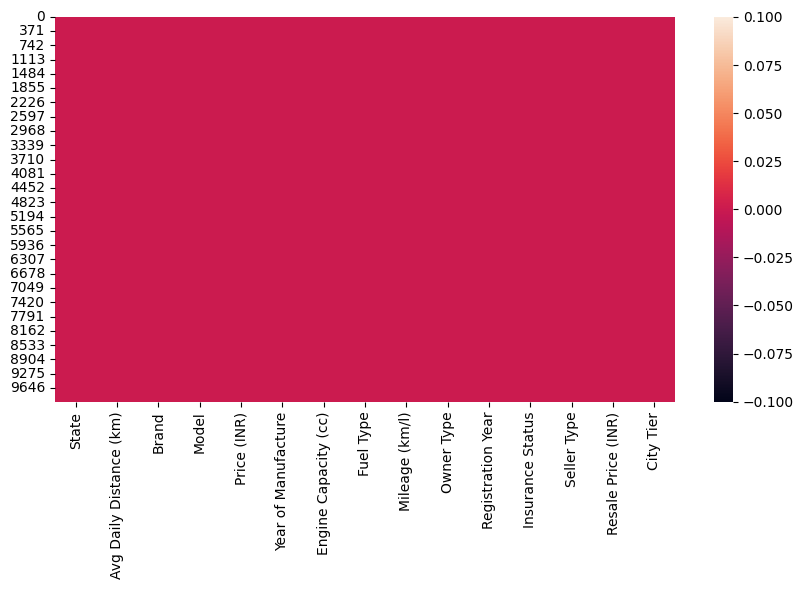

In [9]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull())

In [10]:
df.select_dtypes(include='object').columns

Index(['State', 'Brand', 'Model', 'Fuel Type', 'Owner Type',
       'Insurance Status', 'Seller Type', 'City Tier'],
      dtype='object')

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [38]:
df1 = df[['State', 'Brand', 'Model', 'Fuel Type', 'Owner Type', 'Insurance Status', 'Seller Type', 'City Tier']]

In [39]:
le.fit_transform(df1['State'])

array([2, 6, 3, ..., 9, 3, 9])

In [40]:
df1['State_enc'] =le.fit_transform(df1['State'])

In [42]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns', None)

In [43]:
df1.head(2)

,State,Brand,Model,Fuel Type,Owner Type,Insurance Status,Seller Type,City Tier,State_enc
0,Karnataka,Royal Enfield,Hunter 350,Electric,Second,Active,Individual,Tier 3,2
1,Rajasthan,Bajaj,Dominar 400,Hybrid,Third,Active,Individual,Tier 3,6


In [45]:
df1['Brand_enc'] =le.fit_transform(df1['Brand'])

In [46]:
df1.head(2)

,State,Brand,Model,Fuel Type,Owner Type,Insurance Status,Seller Type,City Tier,State_enc,Brand_enc
0,Karnataka,Royal Enfield,Hunter 350,Electric,Second,Active,Individual,Tier 3,2,5
1,Rajasthan,Bajaj,Dominar 400,Hybrid,Third,Active,Individual,Tier 3,6,0


In [47]:
df1['Model_enc'] =le.fit_transform(df1['Model'])

In [48]:
df1['Fuel Type_enc'] =le.fit_transform(df1['Fuel Type'])

In [49]:
df1['Owner Type_enc'] =le.fit_transform(df1['Owner Type'])

In [50]:
df1['Insurance Status_enc'] =le.fit_transform(df1['Insurance Status'])

In [51]:
df1['Seller Type_enc'] =le.fit_transform(df1['Seller Type'])

In [52]:
df1['City Tier_enc'] =le.fit_transform(df1['City Tier'])

In [53]:
df1.head(2)

,State,Brand,Model,Fuel Type,Owner Type,Insurance Status,Seller Type,City Tier,State_enc,Brand_enc,Model_enc,Fuel Type_enc,Owner Type_enc,Insurance Status_enc,Seller Type_enc,City Tier_enc
0,Karnataka,Royal Enfield,Hunter 350,Electric,Second,Active,Individual,Tier 3,2,5,17,0,1,0,1,3
1,Rajasthan,Bajaj,Dominar 400,Hybrid,Third,Active,Individual,Tier 3,6,0,10,1,2,0,1,3


In [54]:
df2 = pd.concat([df,df1],axis=1)

In [55]:
df2.head(2)

,State,Avg Daily Distance (km),Brand,Model,Price (INR),Year of Manufacture,Engine Capacity (cc),Fuel Type,Mileage (km/l),Owner Type,Registration Year,Insurance Status,Seller Type,Resale Price (INR),City Tier,State,Brand,Model,Fuel Type,Owner Type,Insurance Status,Seller Type,City Tier,State_enc,Brand_enc,Model_enc,Fuel Type_enc,Owner Type_enc,Insurance Status_enc,Seller Type_enc,City Tier_enc
0,Karnataka,68.84,Royal Enfield,Hunter 350,252816,2021,672,Electric,78.41,Second,2024,Active,Individual,149934.18,Tier 3,Karnataka,Royal Enfield,Hunter 350,Electric,Second,Active,Individual,Tier 3,2,5,17,0,1,0,1,3
1,Rajasthan,23.80,Bajaj,Dominar 400,131100,2020,769,Hybrid,89.98,Third,2023,Active,Individual,66960.30,Tier 3,Rajasthan,Bajaj,Dominar 400,Hybrid,Third,Active,Individual,Tier 3,6,0,10,1,2,0,1,3


In [57]:
cat_var = df2.select_dtypes(include='object').columns

In [58]:
df2.drop(cat_var,axis=1,inplace=True)

In [59]:
df2.head(2)

,Avg Daily Distance (km),Price (INR),Year of Manufacture,Engine Capacity (cc),Mileage (km/l),Registration Year,Resale Price (INR),State_enc,Brand_enc,Model_enc,Fuel Type_enc,Owner Type_enc,Insurance Status_enc,Seller Type_enc,City Tier_enc
0,68.84,252816,2021,672,78.41,2024,149934.18,2,5,17,0,1,0,1,3
1,23.80,131100,2020,769,89.98,2023,66960.30,6,0,10,1,2,0,1,3


<Axes: >

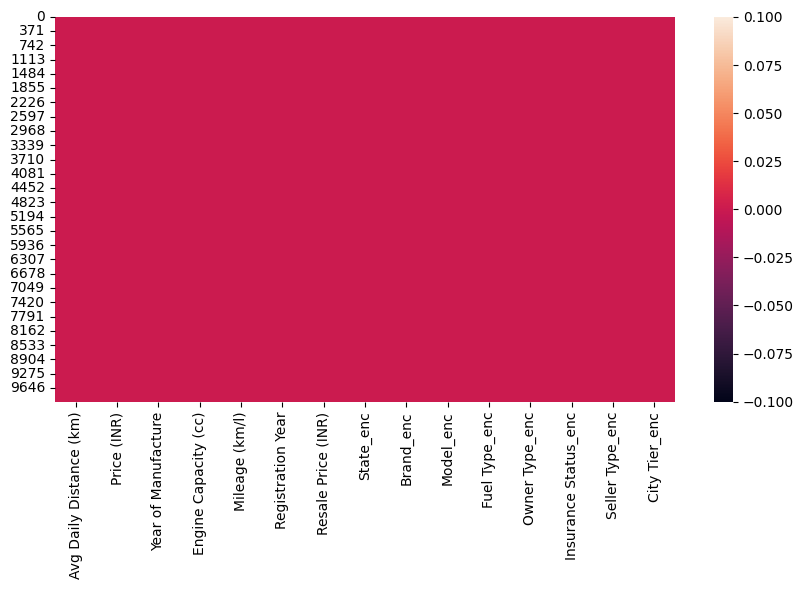

In [69]:
plt.figure(figsize=(10,5))
sns.heatmap(df2.isnull())

In [62]:
num_var = df2.select_dtypes(exclude='object').columns

In [63]:
num_var

Index(['Avg Daily Distance (km)', 'Price (INR)', 'Year of Manufacture',
       'Engine Capacity (cc)', 'Mileage (km/l)', 'Registration Year',
       'Resale Price (INR)', 'State_enc', 'Brand_enc', 'Model_enc',
       'Fuel Type_enc', 'Owner Type_enc', 'Insurance Status_enc',
       'Seller Type_enc', 'City Tier_enc'],
      dtype='object')

In [64]:
X = df2.drop('Price (INR)',axis=1)
y = df2['Price (INR)']

In [65]:
print(X.shape)
print(y.shape)

(10000, 14)
(10000,)


In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [67]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Train model with LinearRegression, Ridge, Lasso

In [68]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr_lasso = Lasso()
lr_ridge = Ridge()

In [70]:
def rsme(y_test, y_pred):
  return np.sqrt(mean_squared_error(y_test, y_pred))

In [71]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
lr_score = lr.score(X_test, y_test)
lr_rmse = rsme(y_test, y_pred)
lr_score, lr_rmse

(0.8102374079267944, 43633.758704811575)

In [72]:
lr_lasso.fit(X_train, y_train)
y_pred = lr_lasso.predict(X_test)
lr_lasso_score = lr_lasso.score(X_test, y_test)
lr_lasso_rmse = rsme(y_test, y_pred)
lr_lasso_score, lr_lasso_rmse

(0.8102378074112739, 43633.71277632175)

In [73]:
lr_ridge.fit(X_train, y_train)
y_pred = lr_ridge.predict(X_test)
lr_ridge_score = lr_ridge.score(X_test, y_test)
lr_ridge_rmse = rsme(y_test, y_pred)
lr_ridge_score, lr_ridge_rmse

(0.8102392605790391, 43633.545706091885)

# Train model with Super vactor Model

In [74]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
svr_score = svr.score(X_test, y_test)
svr_rmse = rsme(y_test, y_pred)
svr_score, svr_rmse

(0.0022848670898903967, 100050.80870877657)

# RandomForestRegressor

In [75]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rf_score = rf.score(X_test, y_test)
rf_rmse = rsme(y_test, y_pred)
rf_score, rf_rmse

(0.8421198913773877, 39799.8130341127)

# xgboost

In [76]:
import xgboost
xgb = xgboost.XGBRegressor()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
xgb_score = xgb.score(X_test, y_test)
xgb_rmse = rsme(y_test, y_pred)
xgb_score, xgb_rmse

(0.8193137049674988, 42577.47761434442)

# Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(random_state = 51)
lr_classifier.fit(X_train, y_train)
lr_score= lr_classifier.score(X_test, y_test)
lr_score

0.0

In [81]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 51)
dt_classifier.fit(X_train, y_train)
accuarcy_dt = dt_classifier.score(X_test, y_test)
accuarcy_dt


0.0

In [83]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [84]:
knn_classifier.score(X_test, y_test)

0.0

In [82]:
print(pd.DataFrame([{'Model': 'Linierregration', 'Score': lr_score, 'RSME' : lr_rmse},
                    {'Model': 'Lasso', 'Score': lr_lasso_score, 'RSME' : lr_lasso_rmse},
                    {'Model': 'Ridge', 'Score': lr_ridge_score, 'RSME' : lr_ridge_rmse},
                    {'Model': 'SupportVactor', 'Score': svr_score, 'RSME' : svr_rmse},
                    {'Model': 'RandomForest', 'Score': rf_score, 'RSME' : rf_rmse},
                    {'Model': 'XGboost', 'Score': xgb_score, 'RSME' : xgb_rmse}],
                   columns=['Model', 'Score', 'RSME']))

             Model     Score           RSME
0  Linierregration  0.000000   43633.758705
1            Lasso  0.810238   43633.712776
2            Ridge  0.810239   43633.545706
3    SupportVactor  0.002285  100050.808709
4     RandomForest  0.842120   39799.813034
5          XGboost  0.819314   42577.477614


In [86]:
from sklearn.model_selection import cross_val_score, KFold
cvs = cross_val_score(rf, X_train, y_train, cv=10)
cvs, cvs.mean()

(array([0.85541184, 0.85953801, 0.84247186, 0.84402615, 0.86170716,
        0.85322724, 0.85273793, 0.83978487, 0.8502725 , 0.84243383]),
 0.8501611391116505)

In [87]:
cvs_rsme = cross_val_score(rf, X_train, y_train, cv=10)
cvs_rsme, cvs_rsme.mean()

(array([0.85370441, 0.85826949, 0.84092536, 0.84381968, 0.86097378,
        0.85339018, 0.85256724, 0.8421236 , 0.85582291, 0.84204091]),
 0.8503637553047436)

In [88]:
import joblib
joblib.dump(rf, 'house_price.pkl')

['house_price.pkl']